<a href="https://colab.research.google.com/github/nhatvnguyen/spokane-power-forecast/blob/main/HW4_Nguyen_ODE_Projectile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nhat Nguyen
### Computational Physics, PHYS 421
#### HW4, due: 11/2, 10 am


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def projectile_time_analytic(v0, angle):
    """
    Calculates projectile time (2-D projectile motion) analytically, with drag.

    Parameters:
        v0: float, initial velocity (up is positive), m/s
        angle: float, initial angle (up is positive), degrees

    Returns:
        times[0] : float for first time element
    """
    g = 9.8 # m/s^2
    a = -g
    rad = angle * np.pi/180 # convert to radian to use np.cos and sin
    time = (2*v0*np.sin(rad))/g
    times = time[time.imag == 0]
    times = times[times > 0]

    if(len(times) == 0):
        return float('nan') # this means there's no real solution, e.g. throwing down when you're underground already
    else:
        return times[0]  # time is an array with one element, but we want to return it as a scalar float

    # return time

In [ ]:
def dx_dt(x, vx, vy, m, R, rho, C, dt):
  """ Calculate the derivative of x as a function of time

    Args
    x : inital position in the x direction
    vx : initial x velocity
    vy : initial y velocity
    m : mass, kg
    R : radius, meters
    rho : density of air, kilograms/meter^3
    C : drag coefficient
    dt : time steps

    Returns
    X : estimated x position from the derivative function
    v_x: estimated x velocity
    """
  dx_dt2 = -(np.pi*(R**2)*rho*C*(vx)*(np.sqrt(vx**2+vy**2)))/(2*m)
  v_x = vx + dx_dt2 * dt
  X = x + v_x*dt

  return X, v_x

def dy_dt(y, vx, vy, m, R, rho, C, dt):
  """ Calculate the derivative of x as a function of time

    Args
    y : inital position in the y direction
    vx : initial x velocity
    vy : initial y velocity
    m : mass, kg
    R : radius, meters
    rho : density of air, kilograms/meter^3
    C : drag coefficient
    dt : time steps

    Returns
    Y : estimated y position from the derivative function
    v_y: estimated y velocity
    """

  g = 9.8 # m/s^2
  dy_dt2 = -(np.pi*(R**2)*rho*C*(vy)*(np.sqrt(vx**2+vy**2)))/(2*m)-g

  v_y = vy + dy_dt2 * dt
  Y = y + v_y*dt - 0.5*(g)*(dt**2)
  return Y, v_y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def projectile(angle, v_o, t_end, dt):
  """
  Calculate the projectile (x and y components) motion of the cannon ball with drag

  Args:
  angle: float, angles (degrees)
  v_o: float, initial velocity (m/s)
  t_end: float, time at the end point (s)
  t_min: float, time at the start (s)
  drag: float, drag constant

  Returns:
  x: numpy array, x position as a function of time
  y: numpy array, y position as a function of time
  vx: numpy array, x velocity as a function of time
  vy: numpy array, y velocity as a function of time
  times: numpy array, time values for x and y

  """

  g = 9.8  # m/s^2
  R = 0.08 # cannon ball radius (m) - 8 cm
  rho = 1.22 # density of air (kg/m^3)
  C = 0.47 # drag coefficient
  m = 1.   # mass of cannonball (kg)
  x_o = 0  # initial starting point x (m)
  y_o = 0  # initial starting point y (m)
  t_min = 0

  rad = angle * np.pi/180 # convert to radian to use np.cos and sin
  vy_o = v_o * np.sin(rad)
  vx_o = v_o * np.cos(rad)

  times = np.arange(t_min, t_end, dt)
  total_steps = len(times)
  x = np.zeros(total_steps)
  y = np.zeros(total_steps)
  vx = np.zeros(total_steps)
  vy = np.zeros(total_steps)
  # initial conditions
  x[0] = x_o
  y[0] = y_o
  vx[0] = vx_o
  vy[0] = vy_o

  i = 1
  while i < total_steps:
    x[i], vx[i] = dx_dt(x[i-1], vx[i-1], vy[i-1], m, R, rho, C, dt)
    y[i], vy[i] = dy_dt(y[i-1], vx[i-1], vy[i-1], m, R, rho, C, dt)
    i += 1


  return x, y, vx, vy, times

In [ ]:
def projectile_moremass(angle, v_o, t_end, dt):
  """
  Calculate the projectile (x and y components) motion of the cannon ball with drag

  Args:
  angle: float, angles (degrees)
  v_o: float, initial velocity (m/s)
  t_end: float, time at the end point (s)
  t_min: float, time at the start (s)
  drag: float, drag constant

  Returns:
  x: numpy array, x position as a function of time
  y: numpy array, y position as a function of time
  vx: numpy array, x velocity as a function of time
  vy: numpy array, y velocity as a function of time
  times: numpy array, time values for x and y

  """

  g = 9.8  # m/s^2
  R = 0.08 # cannon ball radius (m) - 8 cm
  rho = 1.22 # density of air (kg/m^3)
  C = 0.47 # drag coefficient
  m = 5.   # mass of cannonball (kg)
  x_o = 0  # initial starting point x (m)
  y_o = 0  # initial starting point y (m)
  t_min = 0

  rad = angle * np.pi/180 # convert to radian to use np.cos and sin
  vy_o = v_o * np.sin(rad)
  vx_o = v_o * np.cos(rad)

  times = np.arange(t_min, t_end, dt)
  total_steps = len(times)
  x = np.zeros(total_steps)
  y = np.zeros(total_steps)
  vx = np.zeros(total_steps)
  vy = np.zeros(total_steps)
  # initial conditions
  x[0] = x_o
  y[0] = y_o
  vx[0] = vx_o
  vy[0] = vy_o

  i = 1
  while i < total_steps:
    x[i], vx[i] = dx_dt(x[i-1], vx[i-1], vy[i-1], m, R, rho, C, dt)
    y[i], vy[i] = dy_dt(y[i-1], vx[i-1], vy[i-1], m, R, rho, C, dt)
    i += 1


  return x, y, vx, vy, times

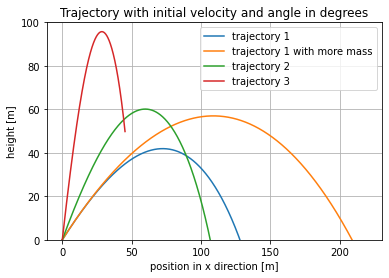

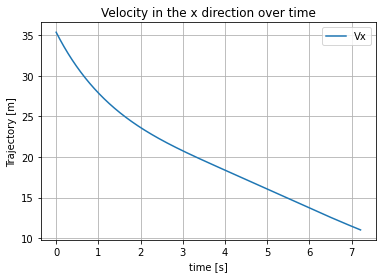

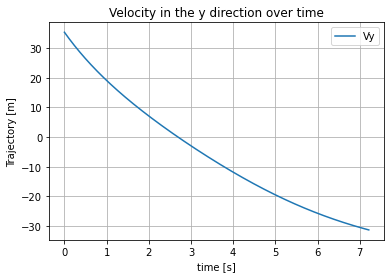

In [ ]:
angle = 45
angle1 = 60
angle2 = 80
velocity = 50
velocity2 = 60
dt = 2e-3
t_end = projectile_time_analytic(velocity, angle)
x, y, vx, vy, t = projectile(angle, velocity, t_end, dt)
x1, y1, vx1, vy1, t1 = projectile(angle1, velocity, t_end, dt)
x2, y2, vx2, vy2, t2 = projectile(angle2, velocity2, t_end, dt)
x3, y3, vx3, vy3, t3 = projectile_moremass(angle, velocity, t_end, dt)
plt.plot(x, y,  label = 'trajectory 1')
plt.plot(x3,y3, label = 'trajectory 1 with more mass')
plt.plot(x1,y1, label = 'trajectory 2')
plt.plot(x2,y2, label = 'trajectory 3')

plt.legend(loc=0)
plt.xlabel('position in x')
plt.ylabel('position in y')
plt.xlabel('position in x direction [m]')
plt.ylabel('height [m]')
plt.title('Trajectory with initial velocity and angle in degrees')
plt.grid()
plt.ylim(0, 100)
plt.figure()
plt.plot(t, vx, label = 'Vx')
plt.title('Velocity in the x direction over time')
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('Trajectory [m]')
plt.legend(loc=0)
plt.figure()
plt.grid()
plt.plot(t, vy, label = 'Vy')
plt.title('Velocity in the y direction over time')
plt.xlabel('time [s]')
plt.ylabel('Trajectory [m]')
plt.legend(loc=0)

## Part C

From the simulation above, the distance traveled is seen to increase when the projectile has more mass.

## Part B extra
Comments on Vx and Vy with respect to time:

As seen from the graph, Vx is the highest initially, then it tapers down and eventually reaches 0 when the projectile motion is complete. On the other hand, the Vy is highest initially also, but it reaches 0 midway the motion, then having a negative velocity due to the downgoing motion.
